In [2]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
import numpy
from glob import glob
import matplotlib.pyplot as pyplot
from keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
import os
%matplotlib inline
# changed from qt to inline

In [3]:
classes_list=['closed', 'no_yawn', 'open', 'yawn']
def printClassList():
    for class_name in classes_list:
        print(f"{classes_list.index(class_name)} -->  {class_name}")
printClassList()   
def getClassvalue(index):
    print(classes_list[index])

0 -->  closed
1 -->  no_yawn
2 -->  open
3 -->  yawn


In [4]:
IMAGE_SIZE=[180,180]
training_path=r'C:/Users/kmman/Documents/Dissertation/driver-detection/driver-detection/train'
testing_path=r'C:/Users/kmman/Documents/Dissertation/driver-detection/driver-detection/test'


In [5]:
VGG16_Architecture=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [6]:
VGG16_Architecture.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [7]:
for layer in VGG16_Architecture.layers:
    print(layer)
    layer.trainable=False

In [8]:
folders = 'C:/Users/kmman/Documents/Dissertation/driver-detection/driver-detection/train' 
num_dirs = len([d for d in os.listdir(folders) if os.path.isdir(os.path.join(folders, d))])

In [9]:
x=Flatten()(VGG16_Architecture.output)

In [10]:
x

<KerasTensor: shape=(None, 12800) dtype=float32 (created by layer 'flatten')>

In [11]:
prediction=Dense(num_dirs,activation='softmax')(x)

In [12]:
prediction

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense')>

In [13]:
model=Model(inputs=VGG16_Architecture.input,outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)


In [16]:
train_data_generator=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2, preprocessing_function=lambda img: tf.image.resize(img, IMAGE_SIZE))
test_data_generator=ImageDataGenerator(rescale=1./255, preprocessing_function=lambda img: tf.image.resize(img, IMAGE_SIZE))


In [17]:
train_data_generator

In [18]:
test_data_generator=ImageDataGenerator(rescale=1./255)

In [19]:
training_set=train_data_generator.flow_from_directory(training_path,target_size=IMAGE_SIZE,batch_size=32,class_mode='categorical')


Found 2900 images belonging to 4 classes.


In [20]:
testing_set=test_data_generator.flow_from_directory(testing_path,target_size=IMAGE_SIZE,batch_size=32,class_mode='categorical')

Found 311 images belonging to 4 classes.


In [21]:
training_set.labels

array([0, 0, 0, ..., 3, 3, 3])

In [22]:
len(training_set)

91

In [23]:
len(testing_set)

10

In [24]:
model.fit(
    training_set,
    validation_data=testing_set,
    epochs=3,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

Epoch 1/3
91/91 [==============================] - 871s 10s/step - loss: 0.4946 - accuracy: 0.7928 - val_loss: 0.1400 - val_accuracy: 0.9325
Epoch 2/3
91/91 [==============================] - 894s 10s/step - loss: 0.2003 - accuracy: 0.9228 - val_loss: 0.0665 - val_accuracy: 0.9871
Epoch 3/3
91/91 [==============================] - 773s 8s/step - loss: 0.1440 - accuracy: 0.9531 - val_loss: 0.1082 - val_accuracy: 0.9518


In [25]:
model.save("./Models/Predefine_Architecture_VGG16_Model.h5")

In [26]:
VGG16_model=load_model("./Models/Predefine_Architecture_VGG16_Model.h5")

In [27]:
test_prediction=model.predict(testing_set)

10/10 [==============================] - 72s 7s/step


In [28]:
test_prediction

array([[6.7802743e-05, 3.1868341e-05, 4.8112324e-01, 5.1877707e-01],
       [4.7799849e-09, 2.3212215e-06, 3.9498922e-05, 9.9995828e-01],
       [4.6462003e-05, 6.8450696e-05, 5.7905680e-01, 4.2082834e-01],
       ...,
       [9.9992919e-01, 6.6918255e-05, 2.2329816e-06, 1.6207852e-06],
       [9.7402062e-07, 3.8020353e-06, 4.5793716e-04, 9.9953735e-01],
       [6.1534192e-06, 9.9996948e-01, 7.6545120e-06, 1.6685844e-05]],
      dtype=float32)

In [29]:
predicted_values=[numpy.argmax(result) for result in test_prediction]

In [30]:
for i in range(len(predicted_values)):
    print(predicted_values[i]," - > ",testing_set.labels[i])

3  - >  0
3  - >  0
2  - >  0
1  - >  0
0  - >  0
0  - >  0
1  - >  0
1  - >  0
1  - >  0
1  - >  0
1  - >  0
2  - >  0
0  - >  0
2  - >  0
0  - >  0
2  - >  0
3  - >  0
2  - >  0
2  - >  0
2  - >  0
1  - >  0
2  - >  0
0  - >  0
1  - >  0
0  - >  0
2  - >  0
2  - >  0
2  - >  0
1  - >  0
1  - >  0
1  - >  0
1  - >  0
3  - >  0
0  - >  0
3  - >  0
1  - >  0
0  - >  0
3  - >  0
1  - >  0
1  - >  0
0  - >  0
3  - >  0
1  - >  0
0  - >  0
1  - >  0
3  - >  0
3  - >  0
0  - >  0
0  - >  0
0  - >  0
1  - >  0
0  - >  0
1  - >  0
0  - >  0
1  - >  0
3  - >  0
1  - >  0
1  - >  0
1  - >  0
3  - >  0
1  - >  0
3  - >  0
0  - >  0
1  - >  0
0  - >  0
3  - >  0
2  - >  0
0  - >  0
3  - >  1
3  - >  1
1  - >  1
1  - >  1
3  - >  1
0  - >  1
3  - >  1
3  - >  1
1  - >  1
3  - >  1
3  - >  1
0  - >  1
1  - >  1
3  - >  1
0  - >  1
3  - >  1
0  - >  1
0  - >  1
0  - >  1
3  - >  1
3  - >  1
0  - >  1
3  - >  1
1  - >  1
0  - >  1
3  - >  1
0  - >  1
0  - >  1
3  - >  1
2  - >  1
1  - >  1
1  - >  1


In [31]:
confusion_matrix_data=confusion_matrix(predicted_values,testing_set.labels)

In [32]:
confusion_matrix_data

array([[18, 21, 15, 15],
       [25, 28, 21, 25],
       [12, 10, 11, 13],
       [13, 41, 13, 30]], dtype=int64)

<Axes: >

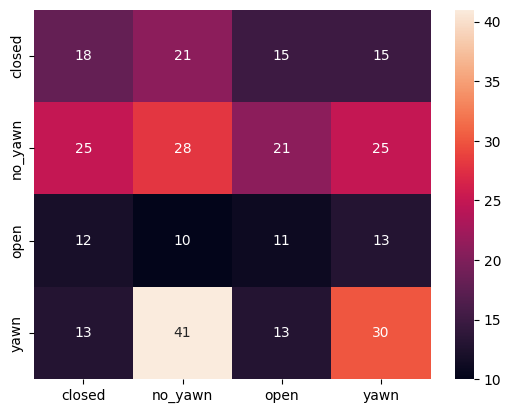

In [33]:
pyplot.figure('Confusion Matrix')
seaborn.heatmap(confusion_matrix_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
# seaborn.heatmap(confusion_matrix_data,annot=True)

In [34]:
classification_report_data=classification_report(predicted_values,testing_set.labels,target_names=classes_list)

In [35]:
print(classification_report_data)

              precision    recall  f1-score   support

      closed       0.26      0.26      0.26        69
     no_yawn       0.28      0.28      0.28        99
        open       0.18      0.24      0.21        46
        yawn       0.36      0.31      0.33        97

    accuracy                           0.28       311
   macro avg       0.27      0.27      0.27       311
weighted avg       0.29      0.28      0.28       311

